In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/PratikhyaManas/Avocado-Prices-Prediction/master/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


<AxesSubplot:>

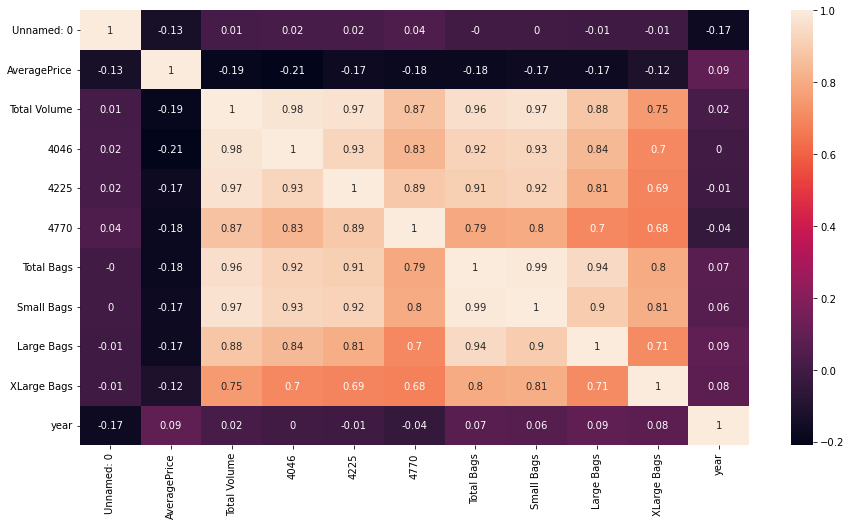

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(round(df.corr(),2),annot=True)

In [9]:
df = df.drop(['Unnamed: 0'],axis=1)

In [10]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
df['XLarge Bags'].value_counts()

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64

In [12]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [13]:
df['type']=df['type'].map({'conventional':0,'organic':1})

In [14]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  int64  
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 1.8+ MB


In [16]:
df = df.rename(columns={'4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770'})

In [17]:
df.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany


In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   PLU_4046      18249 non-null  float64       
 4   PLU_4225      18249 non-null  float64       
 5   PLU_4770      18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  int64         
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 1.8+ MB


In [21]:
df['season'] = df.Date.map(season_of_date)

In [22]:
df.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,winter
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,autumn
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,autumn
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,autumn
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,autumn


In [23]:
df = df.drop(['Date'],axis = 1)

In [24]:
label_cols = ['type','region','season']
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df[label_cols] = df[label_cols].apply(lambda x : label.fit_transform(x))

In [25]:
df.head()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,season
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,3
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   PLU_4046      18249 non-null  float64
 3   PLU_4225      18249 non-null  float64
 4   PLU_4770      18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int64  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
 12  season        18249 non-null  int32  
dtypes: float64(9), int32(2), int64(2)
memory usage: 1.7 MB


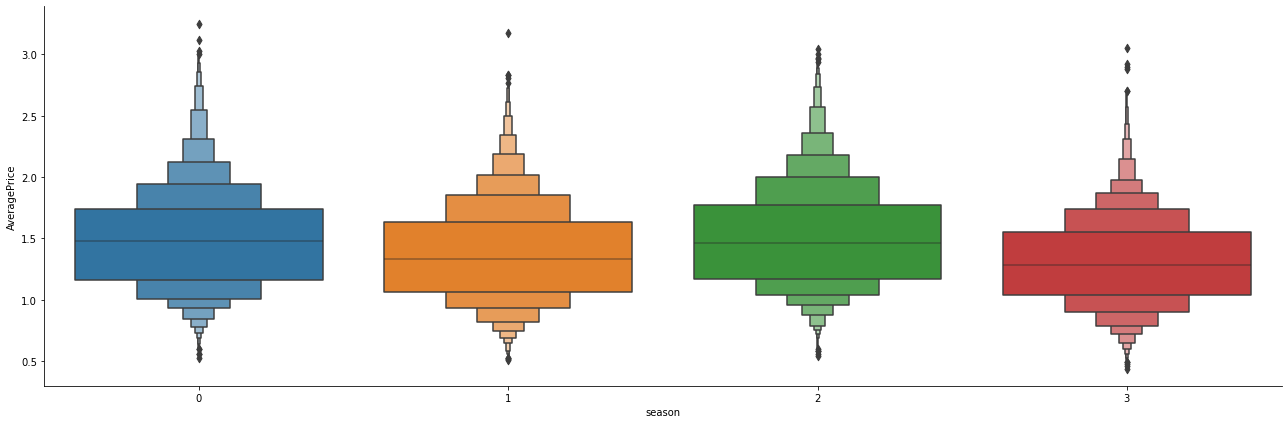

In [27]:
sns.catplot(y= "AveragePrice", x = "season", data = df.sort_values("AveragePrice", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

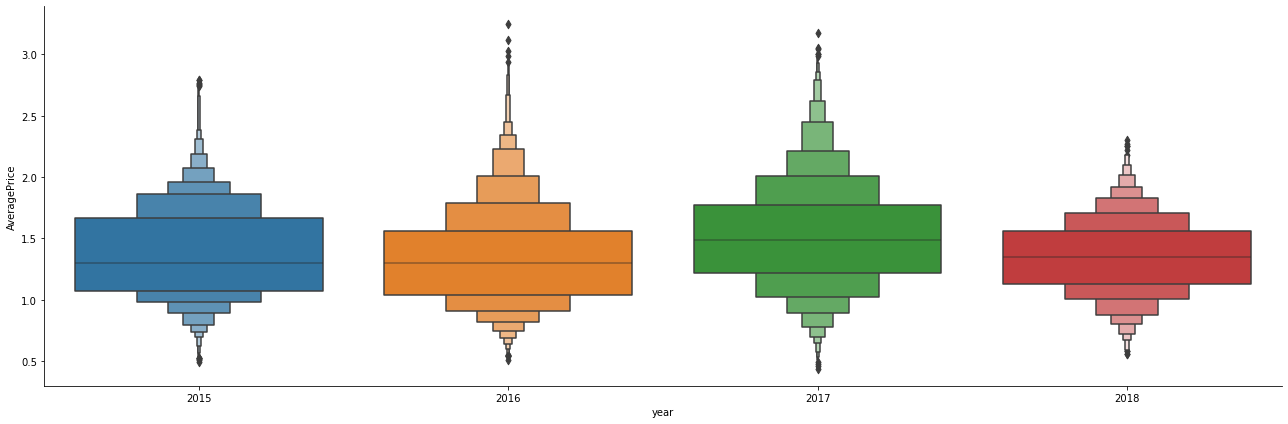

In [28]:
sns.catplot(y= "AveragePrice", x = "year", data = df.sort_values("AveragePrice", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

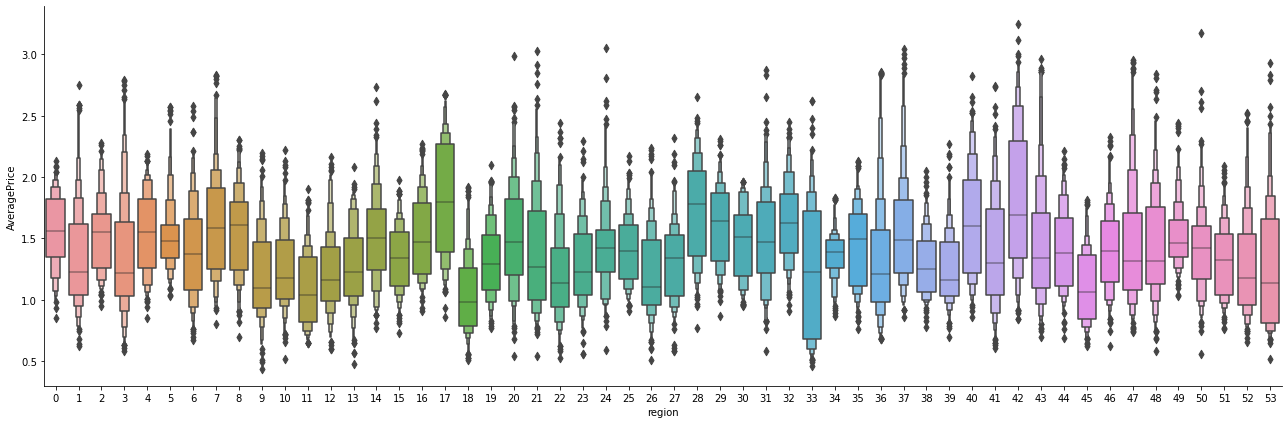

In [29]:
sns.catplot(y= "AveragePrice", x = "region", data = df.sort_values("AveragePrice", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<AxesSubplot:xlabel='season', ylabel='count'>

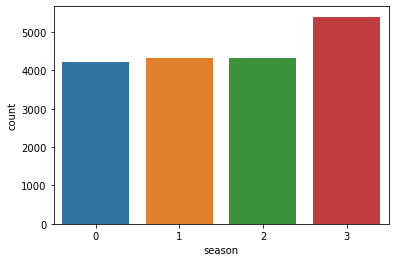

In [30]:
sns.countplot(df['season'])

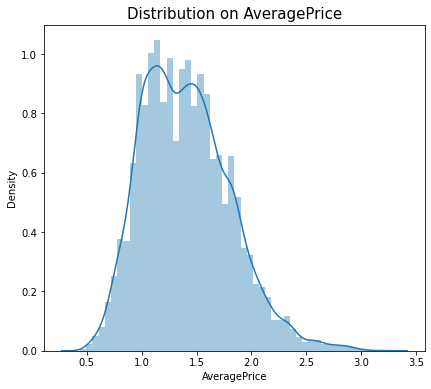

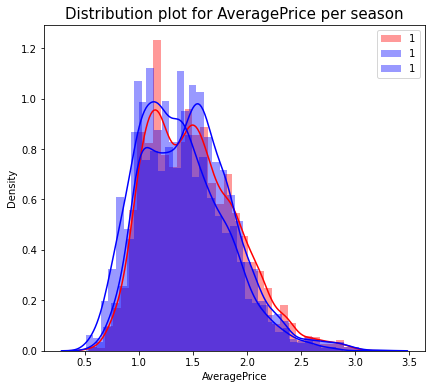

In [31]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df['AveragePrice'])
plt.title("Distribution on AveragePrice",fontsize=15)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,2)
sns.distplot(df[df['season']==2]['AveragePrice'],label=1,color='red')
sns.distplot(df[df['season']==1]['AveragePrice'],label=1,color='blue')
sns.distplot(df[df['season']==0]['AveragePrice'],label=1,color='blue')
plt.legend()
plt.title("Distribution plot for AveragePrice per season",fontsize=15)
plt.show()

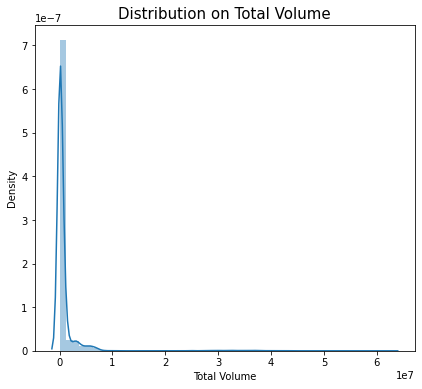

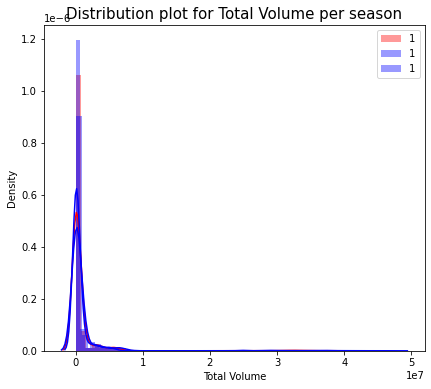

In [32]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df['Total Volume'])
plt.title("Distribution on Total Volume",fontsize=15)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,2)
sns.distplot(df[df['season']==2]['Total Volume'],label=1,color='red')
sns.distplot(df[df['season']==1]['Total Volume'],label=1,color='blue')
sns.distplot(df[df['season']==0]['Total Volume'],label=1,color='blue')
plt.legend()
plt.title("Distribution plot for Total Volume per season",fontsize=15)
plt.show()

<AxesSubplot:xlabel='PLU_4046', ylabel='Density'>

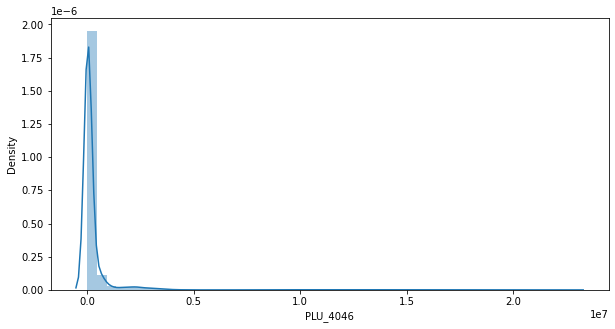

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(df['PLU_4046'])

<AxesSubplot:xlabel='PLU_4225', ylabel='Density'>

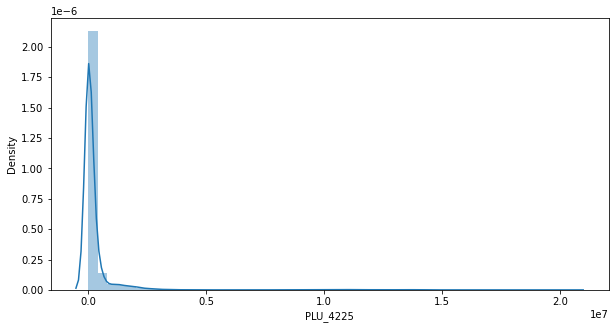

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(df['PLU_4225'])

<AxesSubplot:xlabel='PLU_4770', ylabel='Density'>

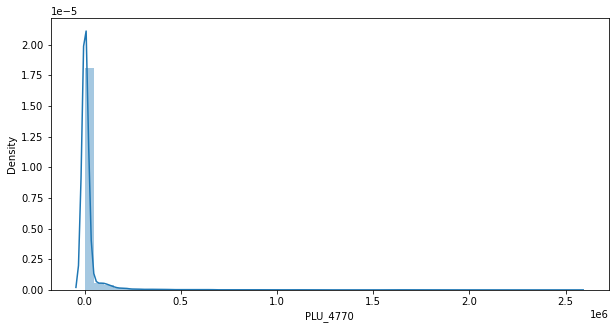

In [35]:
plt.figure(figsize=(10,5))
sns.distplot(df['PLU_4770'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

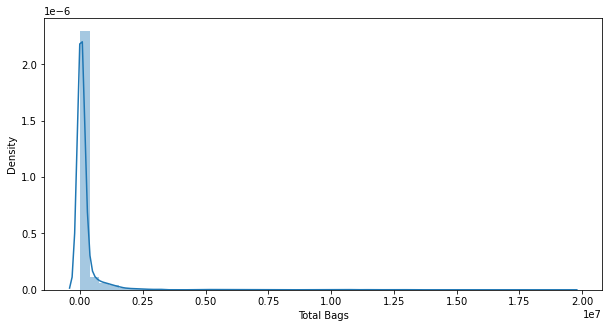

In [36]:
plt.figure(figsize=(10,5))
sns.distplot(df['Total Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

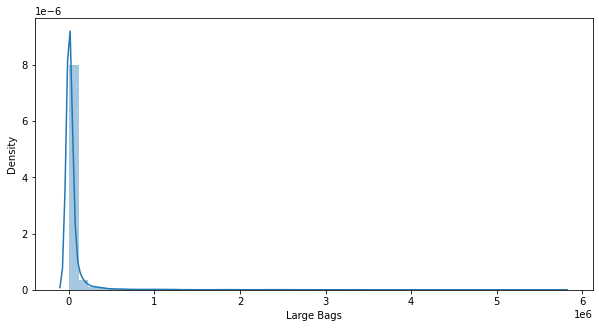

In [37]:
plt.figure(figsize=(10,5))
sns.distplot(df['Large Bags'])

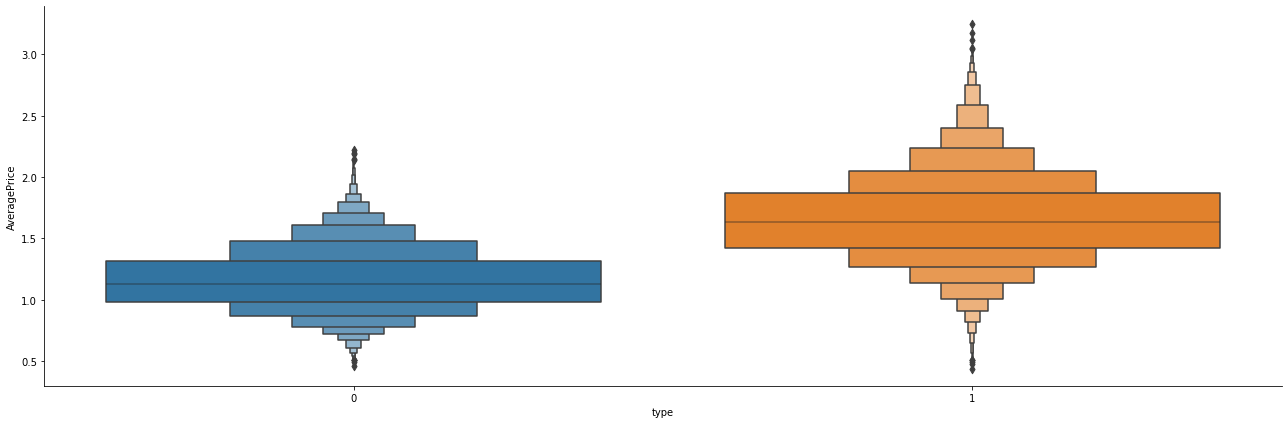

In [38]:
sns.catplot(y= "AveragePrice", x = "type", data = df.sort_values("AveragePrice", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

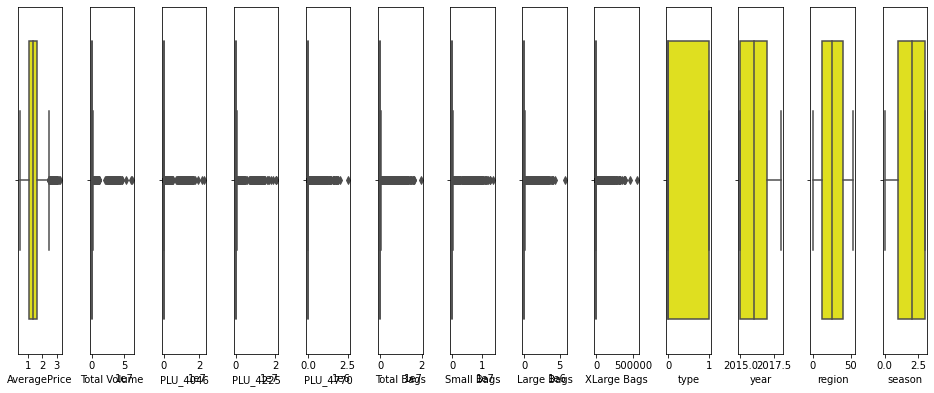

In [39]:
collist=df.columns.values
ncol=36
nrow=20
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color="yellow",orient='h')
    plt.tight_layout()

In [40]:
df.head()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,season
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,3
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,0


In [41]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(18249, 13)

In [42]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [43]:
df_new=df[(z<3).all(axis=1)]
print("old dataframe",df.shape)
print("new dataframe",df_new.shape)
print('total_droped_rows',df.shape[0] - df_new.shape[0])

old dataframe (18249, 13)
new dataframe (17651, 13)
total_droped_rows 598


In [44]:
loss_percentage=(598/18249)*100
loss_percentage

3.276891884486821

In [45]:
x=df_new.drop(['AveragePrice'],axis=1)
y=df_new['AveragePrice']

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
ET=ExtraTreesRegressor()

In [47]:
ET.fit(x,y)

ExtraTreesRegressor()

In [48]:
feature_imp=ET.feature_importances_

In [49]:
for index,val in enumerate(feature_imp):
    print(index, round((val*100),2))

0 4.82
1 7.72
2 7.11
3 3.34
4 4.89
5 4.21
6 8.85
7 0.99
8 37.6
9 6.85
10 7.69
11 5.94


In [50]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17651 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  17651 non-null  float64
 1   PLU_4046      17651 non-null  float64
 2   PLU_4225      17651 non-null  float64
 3   PLU_4770      17651 non-null  float64
 4   Total Bags    17651 non-null  float64
 5   Small Bags    17651 non-null  float64
 6   Large Bags    17651 non-null  float64
 7   XLarge Bags   17651 non-null  float64
 8   type          17651 non-null  int64  
 9   year          17651 non-null  int64  
 10  region        17651 non-null  int32  
 11  season        17651 non-null  int32  
dtypes: float64(8), int32(2), int64(2)
memory usage: 1.6 MB


In [51]:
x=x.drop(['PLU_4770','XLarge Bags'],axis=1)

In [52]:
x.head()

,Total Volume,PLU_4046,PLU_4225,Total Bags,Small Bags,Large Bags,type,year,region,season
0,64236.62,1036.74,54454.85,8696.87,8603.62,93.25,0,2015,0,3
1,54876.98,674.28,44638.81,9505.56,9408.07,97.49,0,2015,0,0
2,118220.22,794.70,109149.67,8145.35,8042.21,103.14,0,2015,0,0
3,78992.15,1132.00,71976.41,5811.16,5677.40,133.76,0,2015,0,0
4,51039.60,941.48,43838.39,6183.95,5986.26,197.69,0,2015,0,0


In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.3920086 , -0.34945151, -0.27849691, ..., -1.21001338,
        -1.69549505,  1.23185944],
       [-0.40125088, -0.3502761 , -0.30309279, ..., -1.21001338,
        -1.69549505, -1.40319016],
       [-0.33870193, -0.35000214, -0.14144901, ..., -1.21001338,
        -1.69549505, -1.40319016],
       ...,
       [-0.44184559, -0.34909848, -0.40879759, ...,  1.98075592,
         1.74705401,  1.23185944],
       [-0.43943771, -0.34833475, -0.40747397, ...,  1.98075592,
         1.74705401,  1.23185944],
       [-0.43816945, -0.34522454, -0.40903979, ...,  1.98075592,
         1.74705401,  1.23185944]])

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=0)

In [55]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (14120, 10)
x_test shape: (3531, 10)
y_train shape: (14120,)
y_test shape: (3531,)


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [57]:
lr = LinearRegression()
xgb = XGBRegressor()
rfr = RandomForestRegressor()
dt = DecisionTreeRegressor()

In [58]:
print(lr.fit(x_train , y_train))
print(xgb.fit(x_train , y_train))
print(rfr.fit(x_train , y_train))
print(dt.fit(x_train , y_train))

LinearRegression()
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
RandomForestRegressor()
DecisionTreeRegressor()


In [59]:
lr_y_pred=lr.predict(x_test)
xgb_y_pred=xgb.predict(x_test)
rfr_y_pred=rfr.predict(x_test)
dt_y_pred=dt.predict(x_test)

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [61]:
print(lr.score(x_train,y_train))
print(xgb.score(x_train,y_train))
print(rfr.score(x_train,y_train))
print(dt.score(x_train,y_train))

0.4363467941700029
0.9460176409866898
0.9808777137623685
1.0


In [62]:
print(lr.score(x_test,y_test))
print(xgb.score(x_test,y_test))
print(rfr.score(x_test,y_test))
print(dt.score(x_test,y_test))

0.4109941681276229
0.8691348108180201
0.8678454272683116
0.7240010508867504


In [63]:
print(r2_score(lr.predict(x_train) , y_train))
print(r2_score(xgb.predict(x_train) , y_train))
print(r2_score(rfr.predict(x_train) , y_train))
print(r2_score(dt.predict(x_train) , y_train))

-0.29175512083720556
0.9393801810487656
0.9786262823321605
1.0


In [64]:
print(r2_score(lr_y_pred , y_test))
print(r2_score(xgb_y_pred , y_test))
print(r2_score(rfr_y_pred , y_test))
print(r2_score(dt_y_pred , y_test))

-0.3643315722738947
0.8450889350117783
0.8352264255498191
0.7252099407119993


In [65]:
print('MAE:', mean_absolute_error(y_test, lr_y_pred))
print('MAE:', mean_absolute_error(y_test, xgb_y_pred))
print('MAE:', mean_absolute_error(y_test, rfr_y_pred))
print('MAE:', mean_absolute_error(y_test, dt_y_pred))

MAE: 0.23204379658845992
MAE: 0.10252321252806669
MAE: 0.09936137071651091
MAE: 0.1339818748229963


In [66]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, lr_y_pred)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, xgb_y_pred)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rfr_y_pred)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE: 0.29710152620014046
RMSE: 0.14004162901896547
RMSE: 0.14072983640146305
RMSE: 0.20337557769263379


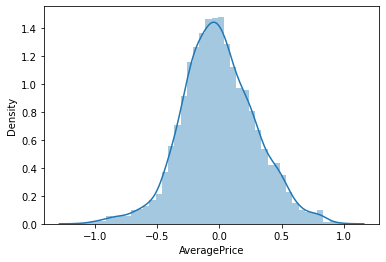

In [67]:
sns.distplot(y_test-lr_y_pred)

plt.show()

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

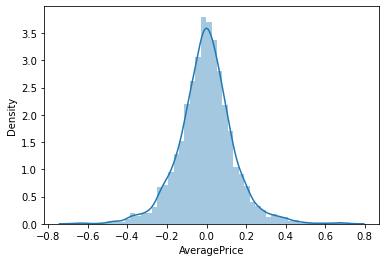

In [68]:
sns.distplot(y_test-xgb_y_pred)

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

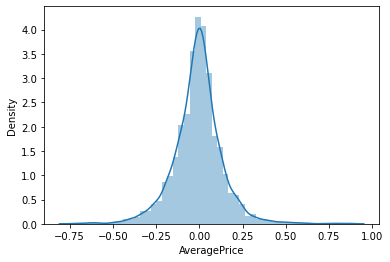

In [69]:
sns.distplot(y_test-rfr_y_pred)

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

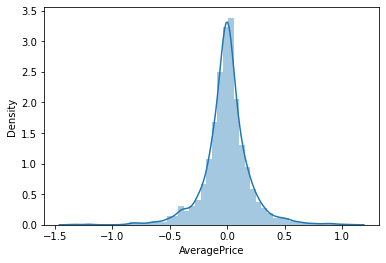

In [70]:
sns.distplot(y_test-dt_y_pred)

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
rf_p = {
    
    "min_samples_split": list(range(2,11)),
    "min_samples_leaf" : list(range(1,10)),
    "max_depth":list(range(1,200)),
    "n_estimators": list(range(1,500))
}

In [73]:
rscv = RandomizedSearchCV(rfr , param_distributions=rf_p , cv =2 , n_iter=10  ,n_jobs = -1 , verbose = 10)

In [74]:
rscv.fit(x,y)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   verbose=10)

In [75]:
rscv.best_estimator_

RandomForestRegressor(max_depth=67, min_samples_leaf=2, min_samples_split=6,
                      n_estimators=422)

In [76]:
rfr =RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=28,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=6, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=96,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [77]:
rfr.fit(x_train , y_train)

RandomForestRegressor(criterion='mse', max_depth=28, max_features='auto',
                      min_samples_leaf=6, min_samples_split=3, n_estimators=96)

In [78]:
print(r2_score(rfr.predict(x_test) , y_test))

0.7898421406252114


In [79]:
print('MAE:', mean_absolute_error(y_test,rfr.predict(x_test)))
print('MSE:', mean_squared_error(y_test, rfr.predict(x_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rfr.predict(x_test))))

MAE: 0.11064241619504567
MSE: 0.02377701438692981
RMSE: 0.15419797140990477


In [80]:
dt_p = {
    "criterion":["mse"],
    "min_samples_split": list(range(2,11)),
    "min_samples_leaf" : list(range(1,10)),
    "max_depth":list(range(1,200))
}

In [81]:
rscvdt = RandomizedSearchCV(dt , param_distributions=dt_p , cv =10 , n_iter=10  ,n_jobs = -1 , verbose = 10)

In [82]:
rscvdt.fit(x,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]},
                   verbose=10)

In [83]:
rscvdt.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=3, min_samples_leaf=7,
                      min_samples_split=9)

In [84]:
dt=DecisionTreeRegressor(criterion='mse', max_depth=96, min_samples_leaf=9,
                      min_samples_split=6)

In [85]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=96, min_samples_leaf=9,
                      min_samples_split=6)

In [86]:
print(r2_score(dt.predict(x_test) , y_test))

0.7109469521255405


In [87]:
print('MAE:', mean_absolute_error(y_test,dt.predict(x_test)))
print('MSE:', mean_squared_error(y_test, dt.predict(x_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dt.predict(x_test))))

MAE: 0.136292220048967
MSE: 0.037299873645777866
RMSE: 0.19313175203932126


In [88]:
import pickle

In [89]:
file=open('Avacado Project.pkl','wb')
pickle.dump(dt,file)

In [90]:
model = open('Avacado Project.pkl','rb')
final_model = pickle.load(model)

y_pred=final_model.predict(x_test)

print(r2_score(y_test,y_pred))

0.7511044167509568
